In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2024,20,22,25,4,9,2
1,2/29/2024,22,14,28,5,9,1
2,2/28/2024,37,15,6,4,9,5
3,2/27/2024,16,25,36,5,9,4
4,2/26/2024,31,10,31,4,9,7
...,...,...,...,...,...,...,...
1823,3/5/2019,43,7,23,1,12,4
1824,3/4/2019,51,24,21,4,8,1
1825,3/3/2019,81,38,2,1,1,2
1826,3/2/2019,65,37,27,4,12,4


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1828 non-null   object
 1   pm25    1828 non-null   int64 
 2   pm10    1828 non-null   int64 
 3   o3      1828 non-null   int64 
 4   no2     1828 non-null   int64 
 5   so2     1828 non-null   int64 
 6   co      1828 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 100.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,42.134573,22.080416,17.324398,7.671772,9.310175,3.951860
std,32.025022,16.144923,12.937656,4.930112,6.627600,2.526896
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.000000,4.000000,4.000000,2.000000
50%,34.000000,19.000000,15.000000,7.000000,8.000000,3.000000
75%,59.000000,32.000000,23.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,20
1,22
2,37
3,16
4,31
...,...
1823,43
1824,51
1825,81
1826,65


<Axes: >

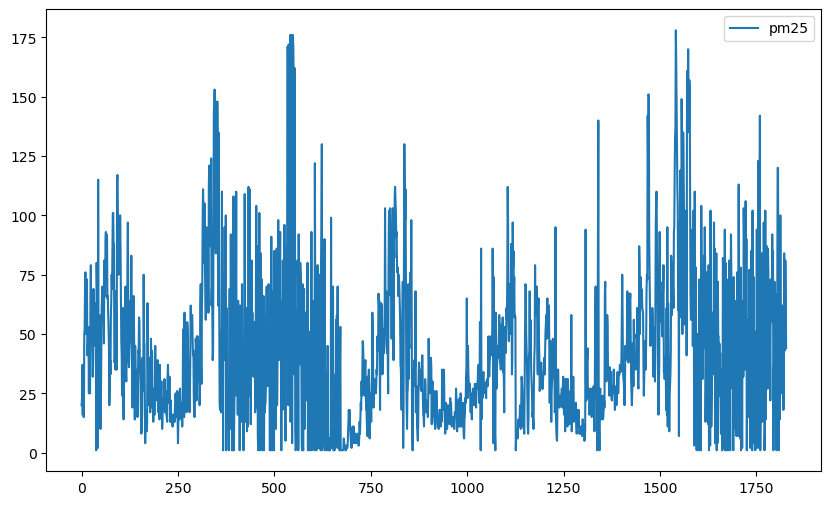

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1462
Test data size: 366


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['pm25'])
y_pred = model.predict(x_test)


In [9]:
#5 Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[25.56373793 25.55200761 25.5402773  25.52854699 25.51681668 25.50508636
 25.49335605 25.48162574 25.46989542 25.45816511 25.4464348  25.43470448
 25.42297417 25.41124386 25.39951354 25.38778323 25.37605292 25.36432261
 25.35259229 25.34086198 25.32913167 25.31740135 25.30567104 25.29394073
 25.28221041 25.2704801  25.25874979 25.24701948 25.23528916 25.22355885]


In [10]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 7. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 8. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)



Testing RMSE: 47.473408203456025

Testing MAPE: 228.3563614098698

MAE: 36.21502944611246


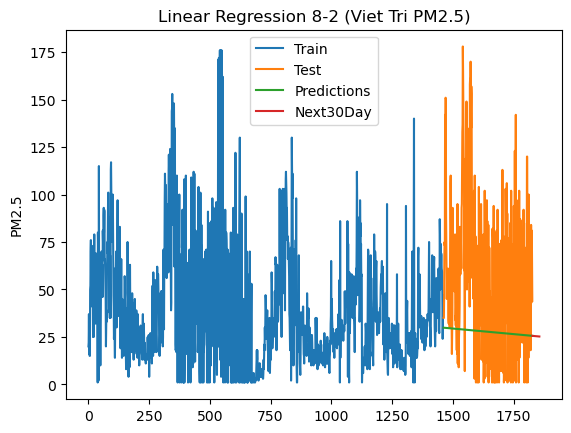

In [11]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 8-2 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

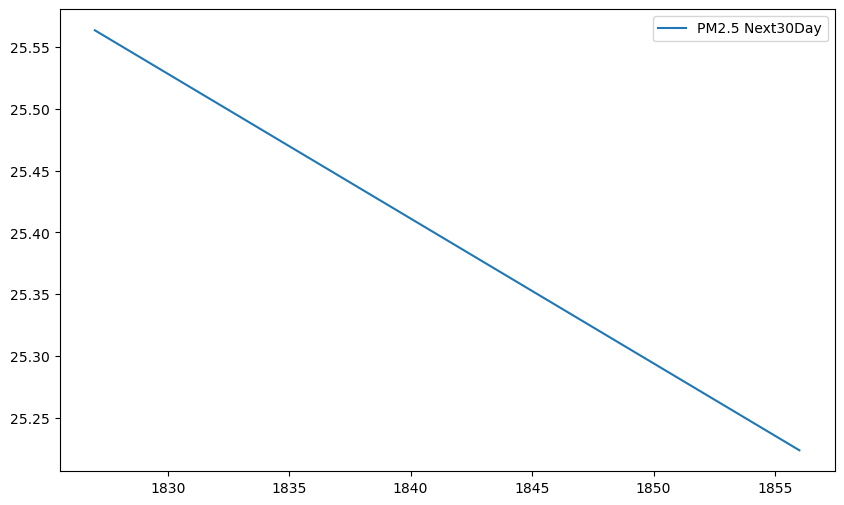

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1462, stop=1828, step=1)